# Fuel Management Project

## Overview

This project aims to analyze and optimize fuel usage within a specified system. The primary objectives include data cleaning, preprocessing, exploratory data analysis (EDA), and the development of predictive models to improve fuel management efficiency.

## Contents

1. **Data Cleaning and Preprocessing**: Steps to handle missing values, remove duplicates, and normalize data.
3. **Feature Engineering**: Creation of new features or transformation of existing ones to improve model performance.
5. **Model Evaluation**: Assessment of model performance using appropriate metrics and validation techniques.
6. **Conclusions and Insights**: Summary of findings and recommendations for improving fuel management.


# 1. Data Loading and Overview

In [3]:
## 1.1: Importing the essential Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', None)

In [2]:
#1.2: Loading the data
df = pd.read_csv("Final Data.csv")
df.head(10)

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001,U1,Jaguar XJL Portfolio V6 D Limousine,Diesel,67691,0,Miles,0.00
2,0012,FL65FBA,Vauxhall CORSA CDTI Car,Diesel,9329,2849,Miles,50.04
3,0013,MJ16XMY,Vauxhall Mokka 4x4 Utility Vehicle,Diesel,29064,5369,Miles,39.29
4,0016,BP16MKK,Nissan Note Car,Diesel,42233,1052,Miles,56.17
5,0017,YD16NAL,Peugeot car Car,Diesel,20475,3319,Miles,108.32
6,0018,YD16NAK,Peugeot 308 Car Car,Diesel,115020,36100,Miles,50.79
7,0019,BP16OPD,Nissan Note Car,Diesel,15559,948,Miles,36.04
8,0020,YH17VCF,Peugeot Expert Combi 9 seat MPV,Diesel,37352,14202,Miles,34.75
9,0021,MF68FNR,Renault Traffic Welfare,Diesel,112,0,Miles,0.00


In [3]:
# 1.3: Looking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        1486 non-null   object 
 1   Registration  1483 non-null   object 
 2   Details       1484 non-null   object 
 3   Product       1484 non-null   object 
 4   Odometer      1484 non-null   object 
 5   Distance      1484 non-null   object 
 6   Unit          1482 non-null   object 
 7   MPG           1482 non-null   float64
dtypes: float64(1), object(7)
memory usage: 93.3+ KB


## Dataset Overview

The dataset contains 1,490 entries with 8 columns related to fuel management. Below is a brief description of the dataset structure:

- **Number**: Identification number for each entry (1486 non-null values, dtype: object)
- **Registration**: Vehicle registration details (1483 non-null values, dtype: object)
- **Details**: Additional details about the entry (1484 non-null values, dtype: object)
- **Product**: Type of fuel product used (1484 non-null values, dtype: object)
- **Odometer**: Odometer reading at the time of fuel entry (1484 non-null values, dtype: object)
- **Distance**: Distance covered (1484 non-null values, dtype: object)
- **Unit**: Unit of measurement for fuel (1482 non-null values, dtype: object)
- **MPG**: Miles per gallon (1482 non-null values, dtype: float64)

The dataset has some missing values across several columns, which will be addressed during the data cleaning and preprocessing phase.

In [4]:
#1.4: Statistical significance of the data
df.describe(include = 'all')

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG
count,1486,1483,1484,1484,1484,1484,1482,1482.000000
unique,1485,1452,301,5,1359,1187,4,NaN
top,1482,MW16DDL,Peugeot Partner Van Small,Diesel,0,0,Miles,NaN
freq,2,2,104,1440,114,250,1265,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.037726
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.914654
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9238.620000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.167500
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.750000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.885000


### Summary Statistics

- **Number**
  - Count: 1486
  - Unique: 1485
  - Most frequent (top): 1482 (2 occurrences)

- **Registration**
  - Count: 1483
  - Unique: 1452
  - Most frequent (top): MW16DDL (2 occurrences)

- **Details**
  - Count: 1484
  - Unique: 301
  - Most frequent (top): Peugeot Partner Van Small (104 occurrences)

- **Product**
  - Count: 1484
  - Unique: 5
  - Most frequent (top): Diesel (1440 occurrences)

- **Odometer**
  - Count: 1484
  - Unique: 1359
  - Most frequent (top): 0 (114 occurrences)

- **Distance**
  - Count: 1484
  - Unique: 1187
  - Most frequent (top): 0 (250 occurrences)

- **Unit**
  - Count: 1482
  - Unique: 4
  - Most frequent (top): Miles (1265 occurrences)

- **MPG**
  - Count: 1482
  - Mean: 12.0377
  - Standard Deviation: 246.9147
  - Minimum: -9238.62
  - 25th Percentile: 3.1675
  - 50th Percentile (Median): 19.75
  - 75th Percentile: 29.885
  - Maximum: 824.85

### Notes

- The dataset has some missing values across several columns, which will be addressed during the data cleaning and preprocessing phase.
- The `MPG` column has some extreme values, which may need further investigation for outliers or data entry errors.

# 2. Data Cleaning

## 2.1: Handling Null Values

In [5]:
#Checking for null values
df.isna().sum()

Number          4
Registration    7
Details         6
Product         6
Odometer        6
Distance        6
Unit            8
MPG             8
dtype: int64

In [6]:
#Percentage of NULL values
total_values = df.shape[0] * df.shape[1]  #This will return the total values that df has
null_values = df.isnull().sum().sum()     #This will return the total null values from all the df
per_null_values = (null_values*100)/total_values     #This will return the percentage of null values

print("The percentage of the null values in this data is:", per_null_values.round(2))

The percentage of the null values in this data is: 0.43


#### As this datafram has less than 1% null values so dropping these values will be used.

In [7]:
#Dropping the null values
df.dropna(axis = 0, inplace = True)
df.head()

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG
1,0001,U1,Jaguar XJL Portfolio V6 D Limousine,Diesel,67691,0,Miles,0.00
2,0012,FL65FBA,Vauxhall CORSA CDTI Car,Diesel,9329,2849,Miles,50.04
3,0013,MJ16XMY,Vauxhall Mokka 4x4 Utility Vehicle,Diesel,29064,5369,Miles,39.29
4,0016,BP16MKK,Nissan Note Car,Diesel,42233,1052,Miles,56.17
5,0017,YD16NAL,Peugeot car Car,Diesel,20475,3319,Miles,108.32


In [8]:
#Check for any null values 
df.isnull().sum()

Number          0
Registration    0
Details         0
Product         0
Odometer        0
Distance        0
Unit            0
MPG             0
dtype: int64

## 2.2: Handling Duplicate Values

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

In [10]:
#The actual values that are duplicate
duplicate_values = df[df.duplicated()]
duplicate_values

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG


#### As this data is illustrating that most of the values from this dataframe are zero in distance and zero in MPG so removing these values might be harmfull for the model because these might be the only zero's values in the dataframe.

So first let's check the unique values across each column

In [11]:
unique_list = []
def uniques_values(raw_data):
    for columns in raw_data.columns:
        print("These are the unique values from the:", columns, " column")
        print("<--------------------------------------------------------------------------------------------->")
        print(raw_data[columns].unique())
        print("The count for all the unique values is:", raw_data[columns].value_counts())
        
uniques_values(df)

These are the unique values from the: Number  column
<--------------------------------------------------------------------------------------------->
['0001' '0012' '0013' ... '96' '96/113' '97']
The count for all the unique values is: Number
0001    1
1893    1
1960    1
1955    1
1948    1
       ..
1119    1
1118    1
1117    1
1116    1
97      1
Name: count, Length: 1481, dtype: int64
These are the unique values from the: Registration  column
<--------------------------------------------------------------------------------------------->
['U1' 'FL65FBA' 'MJ16XMY' ... 'YA07XMB' 'YJ58DGZ' '96/113']
The count for all the unique values is: Registration
MW16DDL    2
YG69JKY    2
YL17OYR    2
YG63ETT    2
YB63USD    2
          ..
YE13NHJ    1
YE13ULH    1
YE13NPJ    1
YK13UTM    1
96/113     1
Name: count, Length: 1450, dtype: int64
These are the unique values from the: Details  column
<--------------------------------------------------------------------------------------------->
['Jagua

#### So as there are more than 250 values with 0 field so it is good to move with removing the duplicates but left the last one and remove the remaining.

In [12]:
df.drop_duplicates(keep= 'last', inplace=True)

## 2.3: Extracting the Car Brand Name

In [13]:
#Getting the car brand name by uisng split and lambda methods
df['Car_name'] = df['Details'].apply(lambda x: x.split(" ")[0])

In [14]:
#Getting the data that is not mined correctly
df_empty_cells = df[df['Car_name'] == ""]
df_empty_cells

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG,Car_name
11,0024,YG69UKP,Caddy Maxi Life Wav,Diesel,8103,8066,Miles,42.22,
12,0025,YG69UKR,Caddy Maxi Life Van,Diesel,6187,6160,Miles,36.93,
14,0027,YL69KJN,VW Caddy,Diesel,1060,1032,Miles,26.60,
15,0028,YL69KJV,VW Caddy,Diesel,360,307,Miles,15.77,
16,0029,YL69KJO,VW Caddy,Diesel,967,884,Miles,24.48,
...,...,...,...,...,...,...,...,...,...
1442,78574,LJ65DPO,Small Sweeper,Diesel,28548,4033,Miles,4.33,
1443,78575,LJ65FWZ,Small Sweeper,Diesel,22090,5901,Miles,4.41,
1444,78576,LJ65FXA,Small Sweeper,Diesel,33210,6513,Miles,3.83,
1445,78578,LJ65FXC,Small Sweeper,Diesel,37376,10179,Miles,5.77,


In [15]:
df_empty_cells['Car_name'] = df_empty_cells['Details'].apply(lambda x: x.split(" ")[2].strip())

/var/folders/b2/pn6h715x3rz171jbp1s72snr0000gn/T/ipykernel_3832/936101977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_cells['Car_name'] = df_empty_cells['Details'].apply(lambda x: x.split(" ")[2].strip())


In [16]:
df_empty_cells['Car_name'].unique()

array(['Caddy', 'VW', 'Custom', 'Welfare', 'Minibus', 'Coachbuilt', '',
       '4', 'Van', 'Tipper', 'Drop', 'Luton', '3.5t', 'Crew', 'Up',
       'Library', '7.5t', '26t', '3', 'RCV', '18t', 'Refuse', 'Toploader',
       'Hookloader', 'Large', 'Small'], dtype=object)

In [17]:
useless_cars = df_empty_cells[(df_empty_cells['Car_name'] == 'Custome') | (df_empty_cells['Car_name'] == 'Welfare') |
               (df_empty_cells['Car_name'] == 'Coachbuilt') | (df_empty_cells['Car_name'] == '') | 
               (df_empty_cells['Car_name'] == '4') | (df_empty_cells['Car_name'] == 'Van') | 
               (df_empty_cells['Car_name'] == 'Tipper') | (df_empty_cells['Car_name'] == 'Drop') | 
               (df_empty_cells['Car_name'] == '3.5t') | (df_empty_cells['Car_name'] == 'Crew') | 
              (df_empty_cells['Car_name'] == 'Up') | (df_empty_cells['Car_name'] == 'Library') | 
              (df_empty_cells['Car_name'] == '7.5t') | (df_empty_cells['Car_name'] == '26t') | 
              (df_empty_cells['Car_name'] == '3') | (df_empty_cells['Car_name'] == '18t') | 
              (df_empty_cells['Car_name'] == 'Refuse') | (df_empty_cells['Car_name'] == 'Toploader') | 
              (df_empty_cells['Car_name'] == 'Hookloader') | (df_empty_cells['Car_name'] == 'Large') | 
              (df_empty_cells['Car_name'] == 'Small')]


usefull_cars = df_empty_cells[(df_empty_cells['Car_name'] == 'Caddy') | (df_empty_cells['Car_name'] == 'VM') |
               (df_empty_cells['Car_name'] == 'Minibus')|  (df_empty_cells['Car_name'] == 'Luton') |
              (df_empty_cells['Car_name'] == 'RCV')]

In [18]:
df1 = df[df['Car_name'] != '']

df1 = pd.concat([df1, usefull_cars], axis = 0)

## 2.4: Converting the Miles into kilometers

In [19]:
df1['Unit'].unique()

array(['Miles', 'Kilometres', 'Hours', 'No Limit'], dtype=object)

In [20]:
#Removing the Rows with Hours and No limit values
df1 = df1[(df1['Unit'] != 'Hours') & (df1['Unit'] != 'No Limit')]

In [21]:
# Conversion factor
mile_to_km = 1.60934
df1['Distance'] = df1['Distance'].astype('float')
# Using apply with a lambda function to update the Distance column
df1['Distance'] = df1.apply(lambda row: row['Distance'] * mile_to_km if row['Unit'] == 'Miles' else row['Distance'], axis=1)
df1.head()

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG,Car_name
1,0001,U1,Jaguar XJL Portfolio V6 D Limousine,Diesel,67691,0.00000,Miles,0.00,Jaguar
2,0012,FL65FBA,Vauxhall CORSA CDTI Car,Diesel,9329,4585.00966,Miles,50.04,Vauxhall
3,0013,MJ16XMY,Vauxhall Mokka 4x4 Utility Vehicle,Diesel,29064,8640.54646,Miles,39.29,Vauxhall
4,0016,BP16MKK,Nissan Note Car,Diesel,42233,1693.02568,Miles,56.17,Nissan
5,0017,YD16NAL,Peugeot car Car,Diesel,20475,5341.39946,Miles,108.32,Peugeot


# 3. Feature Engineering

In [22]:
#1.5: Removing the unwanted columns but first let's look again the data we have
df1.head()

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG,Car_name
1,0001,U1,Jaguar XJL Portfolio V6 D Limousine,Diesel,67691,0.00000,Miles,0.00,Jaguar
2,0012,FL65FBA,Vauxhall CORSA CDTI Car,Diesel,9329,4585.00966,Miles,50.04,Vauxhall
3,0013,MJ16XMY,Vauxhall Mokka 4x4 Utility Vehicle,Diesel,29064,8640.54646,Miles,39.29,Vauxhall
4,0016,BP16MKK,Nissan Note Car,Diesel,42233,1693.02568,Miles,56.17,Nissan
5,0017,YD16NAL,Peugeot car Car,Diesel,20475,5341.39946,Miles,108.32,Peugeot


## 3.1 Unwanted Columns:
1. Number:  because it has no affect on the fuel management it is just a index type
2. Registration: It could be useful for data management but not here

In [23]:
# Dropping the columns
df1.drop(['Number', 'Registration', 'Details', 'Odometer', 'Unit'], axis = 1, inplace = True)
df1.head()

,Product,Distance,MPG,Car_name
1,Diesel,0.00000,0.00,Jaguar
2,Diesel,4585.00966,50.04,Vauxhall
3,Diesel,8640.54646,39.29,Vauxhall
4,Diesel,1693.02568,56.17,Nissan
5,Diesel,5341.39946,108.32,Peugeot


# 4. Outliers Detection and Remove

In [24]:
#Converting the values of Distance into true formated
df1['Distance'] = df1['Distance'].abs()
df1['MPG'] = df1['MPG'].abs()

<Axes: ylabel='Distance'>

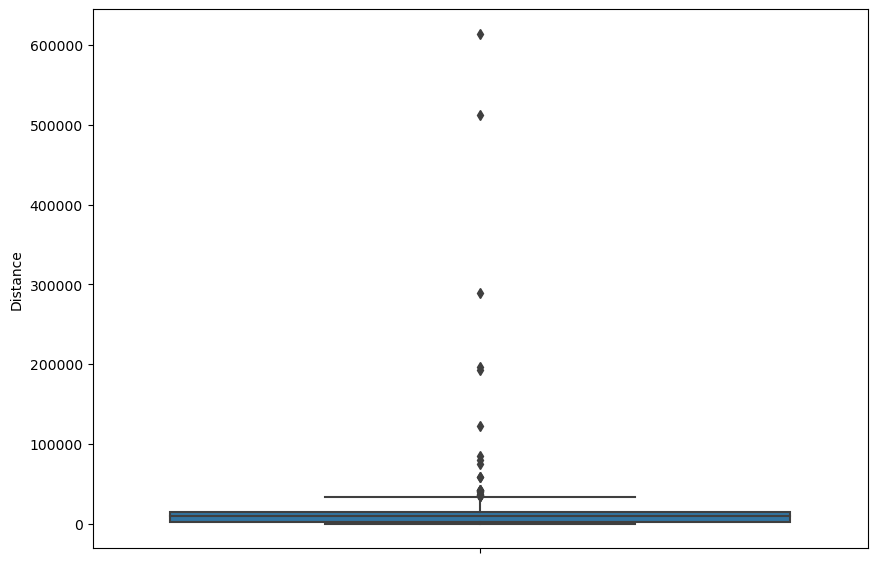

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(y = df1['Distance'])

<Axes: ylabel='MPG'>

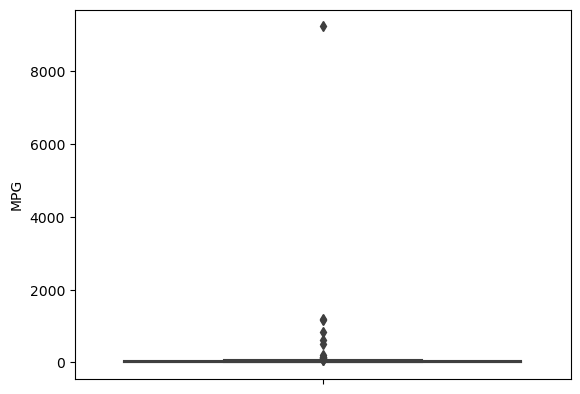

In [26]:
sns.boxplot(y = df1['MPG'])

<Axes: ylabel='MPG'>

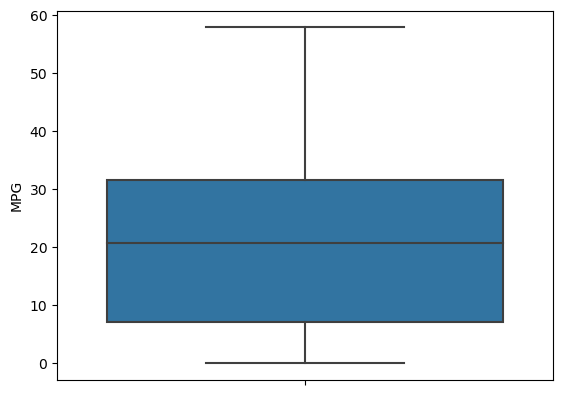

In [27]:
max_thershold = df1['MPG'].quantile(0.98)
df1 = df1[df1['MPG'] < max_thershold]
sns.boxplot(y = df1['MPG'])

In [28]:
max_threshold = df1['Distance'].quantile(0.98)
df1[df1['Distance'] < max_thershold].shape
#sns.boxplot(y = df1['Distance'])

(194, 4)

In [29]:
df1 = df1[(df1['Distance'] != 0) & (df1['MPG'] != 0)]
df1.head()

,Product,Distance,MPG,Car_name
2,Diesel,4585.00966,50.04,Vauxhall
3,Diesel,8640.54646,39.29,Vauxhall
4,Diesel,1693.02568,56.17,Nissan
6,Diesel,58097.17400,50.79,Peugeot
7,Diesel,1525.65432,36.04,Nissan


# 5. Word Dummies

#### 5.1: Changing the names of the cars due to errors

In [30]:
df1.loc[df1['Car_name'] == 'Daf', 'Car_name'] = 'DAF'
df1.loc[df1['Car_name'] == 'Mereecdes', 'Car_name'] = 'Mercedes'
df1.loc[df1['Car_name'] == 'Peugeot', 'Car_name'] = 'PEUGEOT'
df1.loc[df1['Car_name'] == 'peugeot;;', 'Car_name'] = 'PEUGEOT'
df1.loc[df1['Car_name'] == 'peugeot', 'Car_name'] = 'PEUGEOT'

df1.loc[df1['Car_name'] == 'Renauly', 'Car_name'] = 'Renault'
df1.loc[df1['Car_name'] == 'RCV', 'Car_name'] = 'Renault'


df1.loc[df1['Car_name'] == 'Valtra', 'Car_name'] = 'Vauxhall'
df1.loc[df1['Car_name'] == 'Vauvhall', 'Car_name'] = 'Vauxhall'
df1.loc[df1['Car_name'] == 'Vauxall', 'Car_name'] = 'Vauxhall'
df1.loc[df1['Car_name'] == 'vauxha;;', 'Car_name'] = 'Vauxhall'


df1.loc[df1['Car_name'] == 'Kubota', 'Car_name'] = 'Landrover'
df1.loc[df1['Car_name'] == 'Leyland', 'Car_name'] = 'Landrover'


df1.loc[df1['Car_name'] == 'Dennis', 'Car_name'] = 'Ford'
df1.loc[df1['Car_name'] == 'Fiat', 'Car_name'] = 'Ford'
df1.loc[df1['Car_name'] == 'Fuso', 'Car_name'] = 'Ford'
df1.loc[df1['Car_name'] == 'John', 'Car_name'] = 'Ford'


df1.loc[df1['Car_name'] == 'Volkswagon', 'Car_name'] = 'Volkswagen'

df1.loc[df1['Car_name'] == 'Minibus', 'Car_name'] = 'Mitsubishi'

In [31]:
# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
df1['Product_'] = le.fit_transform(df1['Product'])
df1['Car'] = le.fit_transform(df1['Car_name'])
# printing label
df1.head()

,Product,Distance,MPG,Car_name,Product_,Car
2,Diesel,4585.00966,50.04,Vauxhall,1,10
3,Diesel,8640.54646,39.29,Vauxhall,1,10
4,Diesel,1693.02568,56.17,Nissan,1,7
6,Diesel,58097.17400,50.79,PEUGEOT,1,8
7,Diesel,1525.65432,36.04,Nissan,1,7


In [32]:
car_dict = { 0 : 'Caddy', 1: 'DAF', 2 : 'Ford', 3: 'Iveco', 4: 'Landrover', 5: 'Mercedes',
            6: 'Mitsubishi', 7: 'Nissan', 8: 'PEUGEOT', 9: 'Renault', 10: 'Vauxhall', 11: 'Volkswagen', 
            12: 'Volvo'}
Product_dict = { 0: 'CNG', 1: 'Diesel', 2: 'Gasoil' }

In [33]:
#Removing the unwanted columns
df1.drop(['Product', 'Car_name'], axis =1, inplace = True)

In [34]:
df1.corr()

,Distance,MPG,Product_,Car
Distance,1.000000,-0.014266,-0.037636,0.028429
MPG,-0.014266,1.000000,0.043075,0.139645
Product_,-0.037636,0.043075,1.000000,0.080022
Car,0.028429,0.139645,0.080022,1.000000


In [35]:
#Checkpoint
df_cleaned = df1.copy()

# 6. Machine Learning

### 6.1: Dividing the data into dependent and independent columns

In [36]:
df_cleaned = df_cleaned.reset_index()
df_cleaned.drop(['index'], axis = 1, inplace = True)
df_cleaned.head()

,Distance,MPG,Product_,Car
0,4585.00966,50.04,1,10
1,8640.54646,39.29,1,10
2,1693.02568,56.17,1,7
3,58097.17400,50.79,1,8
4,1525.65432,36.04,1,7


In [37]:
x = df_cleaned.drop(['MPG'], axis = 1)
x.head()

,Distance,Product_,Car
0,4585.00966,1,10
1,8640.54646,1,10
2,1693.02568,1,7
3,58097.17400,1,8
4,1525.65432,1,7


In [38]:
y = df_cleaned.iloc[:, 1:2]
y

,MPG
0,50.04
1,39.29
2,56.17
3,50.79
4,36.04
...,...
971,17.25
972,19.80
973,17.85
974,34.32


### 6.2: Splitting the data into train test

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("X train shape: ", x_train.shape)
print("x test shape: ",x_test.shape)
print("Y train shape: ",y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (780, 3)
x test shape:  (196, 3)
Y train shape:  (780, 1)
Y test shape:  (196, 1)


### 6.3: Model Building

In [41]:
#Starting with linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)
prediction=model.predict(x_test)

linear_model=model.score(x_test,y_test)
print("Linear Model Score:",linear_model)

Linear Model Score: -1.8328851927984502e-05


In [42]:
#Decision Tree
from sklearn import tree
dt_model=tree.DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_leaf_nodes=5)
dt_model.fit(x_train,y_train)
dt_score=dt_model.score(x_test,y_test)
print("Decision Tree model score:",dt_score)

Decision Tree model score: 0.3870958248761115


In [43]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor(n_estimators=10,
                                          criterion='squared_error',
                                          max_depth=5,
                                          min_samples_leaf=5,)
random_forest_model.fit(x_train,y_train)
random_forest_score=random_forest_model.score(x_test,y_test)
print("Random Forest Score is:",random_forest_score)

Random Forest Score is: 0.6015571940760807


/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5,
                              weights='distance')
knn_model.fit(x_train,y_train)
knn_score=knn_model.score(x_test,y_test)
print("KNN score:",knn_score)

KNN score: -0.3141625944813222


In [45]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor(learning_rate=1.0,
                                               n_estimators=20,
                                               max_depth=5,
                                               min_samples_leaf=5
                                               )
gradient_boost_model.fit(x_train,y_train)
gradient_boost_score=gradient_boost_model.score(x_test,y_test)
print("Gradient Boost Model Score:",gradient_boost_score)


Gradient Boost Model Score: 0.3851462376042597


/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
#XGBoost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(x_train,y_train)
xgb_score=xgb_model.score(x_test,y_test)
print("XG Boost score:",xgb_score)

XG Boost score: 0.346398154031504


/Users/usmanali/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:51:03] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [47]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
adaboost_model=AdaBoostRegressor(n_estimators=20,
                                 learning_rate=0.1,
                                 loss='square')
adaboost_model.fit(x_train,y_train)
adaboost_score=adaboost_model.score(x_test,y_test)
print('ADA boost model score:',adaboost_score)

ADA boost model score: 0.5076983257185559


/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Model will be improved

In [1]:
import joblib

joblib.dump(random_forest_model, 'fuel_mileage_model.pkl')

#Model Testing`
pickle.dump(random_forest_model, open('Fuel_Management_ML_Model.pkl', 'wb'))

NameError: name 'random_forest_model' is not defined

In [4]:
#Load the model
model = joblib.load('fuel_mileage_model.pkl')
#Fetech the data
car_dict = {'CADDY': 0, 'DAF': 1, 'FORD': 2, 'IVECO': 3, 'LANDROVER': 4, 'MERCEDES': 5,
            'MITSUBISHI': 6, 'NISSAN': 7, 'PEUGEOT': 8, 'RENAULT': 9, 'VAUXHALL': 10, 
            'VOLKSWAGEN': 11, 'VOLVO': 12}

product_dict = {'CNG': 0, 'DIESEL': 1, 'GASOIL': 2}
#Getting user data in uppercase
Distance = float(input("Enter the Distance: "))
Product = input("Enter the Gas Type: ").upper()
Car = input("Enter the Car Brand: ").upper()
oil = float(input("How much fuel you have used: "))
Milage = Distance/oil

if Car in car_dict:
    Car = car_dict[Car]
else:
    print(Car)
    Car = None
    
if Product in product_dict:
    Product = product_dict[Product]
else:
    print(Product)
    Product = None


#Get the Results
if Product is None or Car is None:
    print("These Values doesn't Exist")
else:
    Result = model.predict(np.array([Distance, Product, Car]).reshape(1,3))[0].round(3)
    print("The fuel Milage Must be between:", Result-5, "to", Result+5)
    if Milage > Result-5 or Milage < Result+5:
        print("Your MPG is:", Milage)
        print("The Milage is accurate")
    else:
        print("Your MPG is:", Milage)
        print("There might be a fuel theft")

Enter the Distance: 20
Enter the Gas Type: cng
Enter the Car Brand: ford
How much fuel you have used: 2
The fuel Milage Must be between: 10.649 to 20.649
Your MPG is: 10.0
The Milage is accurate


/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
input("Enter number")

Enter number45


'45'

In [52]:
car_dict['']

KeyError: ''

In [5]:
import sklearn
sklearn.__version__

'1.3.0'

In [ ]:
Car = input("Enter the Car Brand: ").upper()
if Car in car_dict:
    Car = car_dict[Car]
    print(Car)
else:
    print("The car brand provided does not exist.")
    Car = None